# Examen parcial 3 (calculo numerico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 30.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

Realizado por Mario José Felix Rojas  

1017261080

# Ejercicio 1

El archivo $\textbf{data_radius_density.csv}$ contiene dos columnas: radio ($ r $) y la densidad ($ \rho (r) $) de un disco plano en función del radio

El disco es lo suficientemente delgado como para que, con fines matemáticos, podamos tratarlo como un objeto bidimensional. Asumimos que la densidad se da en términos de masa por unidad de área (llamada densidad de área), y además asumimos que la densidad varía solo a lo largo del radio del disco (llamada densidad radial). Orientamos el disco en el plano xy, con el centro en el origen. Entonces, la densidad del disco puede ser tratada como una función de x, denotada $\rho(x)$.
<table><tr>
<td> <img src="disk_radius_density.png" width="500" /> </td>
</tr></table>   

* a) importar los datos usando Pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje `x` y el eje `y`).

* b) sabiendo que la masa del disco viene dada por una integral:
$$ m = \int_0^{r} 2 \pi \ r * \rho (r) \ dr $$
     calcular la masa del disco mediante integración numérica

* Pista:`x`: is radius and `y`: is ***integrand***


#### Primer numeral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv (r'data_radius_density.csv')
print(df)

      radius   density
0   0.000000  0.000000
1   0.040404  0.201008
2   0.080808  0.284268
3   0.121212  0.348155
4   0.161616  0.402015
..       ...       ...
95  3.838384  1.959179
96  3.878788  1.969464
97  3.919192  1.979695
98  3.959596  1.989873
99  4.000000  2.000000

[100 rows x 2 columns]


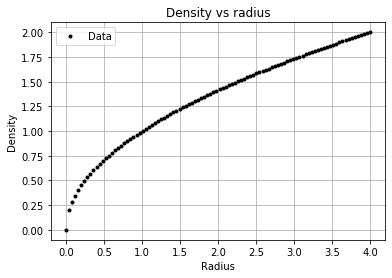

In [3]:
x =df['radius']
y =df['density']
fig, ax = plt.subplots(1)
ax.set_title('Density vs radius')
ax.plot(x,y,'.k', label='Data')
ax.set_xlabel('Radius')
ax.set_ylabel('Density')
ax.grid()
ax.legend()

#### Segundo numeral

In [4]:
import scipy.integrate as integrate # Se importan las librerias para resolver el problema
import numpy as np

como solo se conocen los datos, entonces se integra usando estos datos con integrate y la regla de Simpson

In [5]:
I_simps=2*np.pi*integrate.simps(y,x)
print('El valor de la integral para el método de Simpson es: %.4f'%I_simps)

El valor de la integral para el método de Simpson es: 33.5040


# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica.
* d) hacer un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* e) usando el ultimo grafico hace una estimacion de Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)
* f) hace interpolacion cubica (100 puntos) de los valores de pression $P$, repite puntos `c)` y `d)`

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

In [6]:
# Se importan los datos
df1 = pd.read_csv (r'data_pressure_vs_temperature.csv')
xx = df1['Temperature']
yy = df1['Pressure']

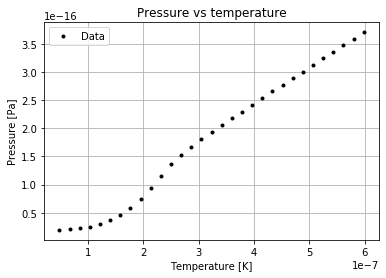

In [7]:
# Grafica de P vs T
fig1,ax1 = plt.subplots(1)
ax1.plot(xx,yy, '.k',label='Data')
ax1.set_title('Pressure vs temperature')
ax1.set_xlabel('Temperature [K]')
ax1.set_ylabel('Pressure [Pa]')
ax1.grid()
ax1.legend()

Se sabe que para un gas de Bose se tiene que la capacidad calorífica se puede aproximar 
$$ C_v \approx \left (\frac{dP}{dT} \right) $$

In [8]:
# Se usa gradient puesto que se tienen datos de la presión y la temperatura
dPdT = np.gradient(yy,xx)
print(len(dPdT))

31


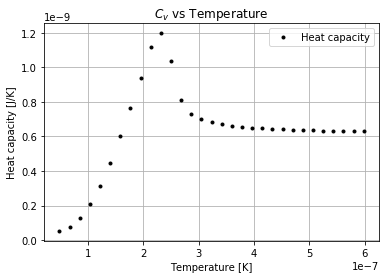

In [9]:
fig2,ax2 = plt.subplots(1)
ax2.set_title('$C_v$ vs Temperature')
ax2.plot(xx,dPdT,'.k',label='Heat capacity')
ax2.set_xlabel('Temperature [K]')
ax2.set_ylabel('Heat capacity [J/K]')
ax2.legend()
ax2.grid()

In [10]:
# Desde la grafica se puede ver que la temperatura crítica está dada aproximadamente para el valor de 1.2e-9 de capacidad
print('El valor máximo de la capacidad calorífica es: %.5e'% max(dPdT))
for i in range(0,len(dPdT)):
    if dPdT[i] == max(dPdT):
        print('La temperatura crítica es:  %.5e'%xx[i],'K')

El valor máximo de la capacidad calorífica es: 1.19770e-09
La temperatura crítica es:  2.31478e-07 K


# Ejercicio 3

Dada es Matrix $S$:

$$S=
\begin{bmatrix}
1 &  -1 & -1 & -1\\
-1 &  2 & 0 & 0\\
-1 &  3 & 3 & 0 \\
-1 &  0 & 1 & 4 \\
\end{bmatrix}$$


a) calcular $S^5$ utilizando diagonalización.  

b) crear una funcion `matrix_power(A,n)` que recive dos parametros: matrix $A$, y valor entero de la potencia $n$. Funcion tiene que devolver una matrix $M=A^n$ (usa diagonalizacion)


Para encontrar la potencia $$A^n = P D^n P^{-1}$$

In [11]:
S = np.array( [[ 1 ,-1, -1,-1],
               [-1 , 2,  0, 0],
               [-1 , 3,  3, 0],
               [-1 ,0, 1,4]] )
print('La matriz S es:\n',S)

La matriz S es:
 [[ 1 -1 -1 -1]
 [-1  2  0  0]
 [-1  3  3  0]
 [-1  0  1  4]]


In [12]:
evalues, evectors = np.linalg.eig(S)
P = evectors
print(P)

[[-3.49561271e-01  7.94033408e-01  7.62229110e-02  8.88586496e-16]
 [ 1.21959906e-01  4.79650284e-01  3.61664456e-01  3.23122362e-16]
 [ 3.83368157e-01 -2.42866291e-01 -8.33174113e-01 -7.07106781e-01]
 [ 8.46145115e-01  2.83659156e-01  4.11351172e-01  7.07106781e-01]]


In [13]:
#Poniendo los autovalores dentro de la matriz:
print(np.shape(S))

(4, 4)


In [14]:
D = np.zeros(np.shape(S))
for i in range(3):
    D[i,i] = evalues[i]

In [15]:
print(D) # Eigen-values matrix

[[4.86619826 0.         0.         0.        ]
 [0.         0.34455762 0.         0.        ]
 [0.         0.         1.78924412 0.        ]
 [0.         0.         0.         0.        ]]


In [16]:
P_1 = np.linalg.inv(evectors)
print(P_1) # eigen-vectors matrix inverse

[[-0.5104852   0.79495719  0.58933991  0.58933991]
 [ 1.16666341  0.12636479  0.31915793  0.31915793]
 [-1.37511912  2.32933088 -0.6220131  -0.6220131 ]
 [ 0.94280904 -2.3570226  -0.47140452  0.94280904]]


In [17]:
print(D**2)

[[23.67988553  0.          0.          0.        ]
 [ 0.          0.11871995  0.          0.        ]
 [ 0.          0.          3.20139452  0.        ]
 [ 0.          0.          0.          0.        ]]


In [18]:
# Así el valor de S**5 es:
S_5 = np.matmul(P,np.matmul(D**5,P_1))
print(S_5)

[[  485.  -755.  -563.  -563.]
 [ -179.   280.   192.   192.]
 [ -513.   796.   626.   626.]
 [-1189.  1853.  1356.  1356.]]


In [19]:
#La función potencia se puede desarrollar:

def matrix_power(A,n):
    evalues, evectors = np.linalg.eig(A) # Obtiene los eigen vectors and values
    P = evectors
    D = np.zeros(np.shape(A))
    P_1 = np.linalg.inv(P)
    for i in range(3):
        D[i,i] = evalues[i]
    return np.matmul(P,np.matmul(D**n,P_1))

In [20]:
matrix_power(S,5)

array([[  485.,  -755.,  -563.,  -563.],
       [ -179.,   280.,   192.,   192.],
       [ -513.,   796.,   626.,   626.],
       [-1189.,  1853.,  1356.,  1356.]])

# Feedback:
```
Exercise 1.
Importation of the data + labeled plot (rho vs. r)	            (max 0.5p):	0.5p
Calculation of the integral                 		              (max 1.5p):	0.5p

Exercise 2.
Importation of the data + labeled plot P vs. T 	               (max 0.5p):	0.5p
Calculation of the derivative and plot Cv vs. T        		   (max 2.0p):	2.0p
Approximation of the critical temperature                         (max 0.5p):	0.5p
Interpolation                                                     (max 1.0p):	0.0p

Exercise 3.
Calculation of the M^n                                 	       (max 2.0p):	2.0p
Function of the M^n                                    	       (max 2.0p):	2.0p

- Total:                                                          (max 10.0p):   8.0p
```